In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os
from pathlib import Path



#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [2]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["/Data/v3"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 6
Loading... Folder 1 of 1, Sample 2 of 6
Loading... Folder 1 of 1, Sample 3 of 6
Loading... Folder 1 of 1, Sample 4 of 6
Loading... Folder 1 of 1, Sample 5 of 6
Loading... Folder 1 of 1, Sample 6 of 6


In [36]:
data[1]

{'Samplerate': [1000, 1000, 1000, 1000, 1000, 1000],
 'Samplename': ['DS30_r9_t1_L11_n30',
  'DS30_r9_t1_L09_n30',
  'DS30_r9_t1_L07_n30',
  'DS30_r9_t1_L05_n30',
  'DS30_r9_t15_L11_n30',
  'DS30_r9_t125_L11_n30'],
 'Offset': [{'presFesto-0': 4.998001222222222,
   'DigOut-1': -0.0520727777777778,
   'AWM5-5': 1.0497440000000002,
   'SSCDP05-3': 2.521161},
  {'presFesto-0': 4.9930522222222224,
   'DigOut-1': -0.05165455555555558,
   'AWM5-5': 1.0482075555555554,
   'SSCDP05-3': 2.5169622222222223},
  {'presFesto-0': 4.992401222222222,
   'DigOut-1': -0.05315344444444446,
   'AWM5-5': 1.047960777777778,
   'SSCDP05-3': 2.5171574444444444},
  {'presFesto-0': 4.993335666666668,
   'DigOut-1': -0.05285055555555558,
   'AWM5-5': 1.0479685555555556,
   'SSCDP05-3': 2.5164547777777773},
  {'presFesto-0': 4.991534111111111,
   'DigOut-1': -0.053466888888888904,
   'AWM5-5': 1.0478795555555556,
   'SSCDP05-3': 2.5160288888888886},
  {'presFesto-0': 4.995357222222222,
   'DigOut-1': -0.0538998888

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


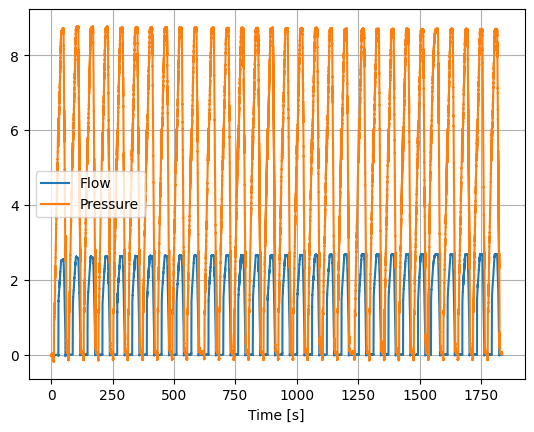

In [37]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    flow = data[0][i]['AWM5-5'].values #SLPM
    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==1:
        break
        

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
#plt.plot(time, P_setpoint)
#plt.plot(time,data[0][i]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')
#plt.ylim(-0.1,0.1)
plt.grid()

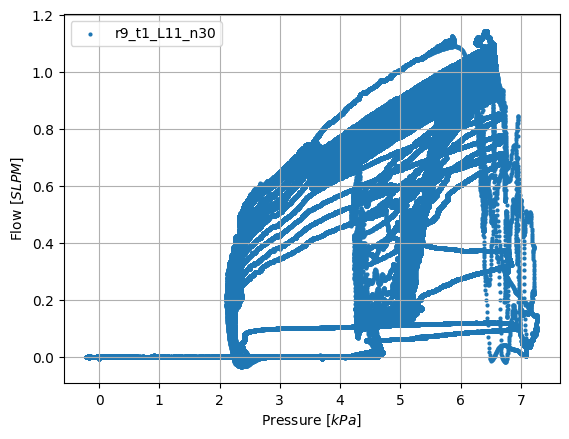

In [11]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    #plt.title(f'Experiment {i+1}')
    break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

In [8]:
# Slice data per run 

data_sliced = []
for index,value in enumerate(data[0]):
    runs = [] # new list for all the runs in data[0]
    start = 0
    run_count = 1  # Counter for run numbe
    flow = data[0][index]['AWM5-5'].values

    # Check which pressure sensor is used 
    df = data[0][index]

    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable pressure sensor data.")
        continue  # Skip this iteration and move to the next experiment

    while start < len(data[0][index]['DigOut-1']):
        start = np.argmax(data[0][index]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
        end = np.argmax(data[0][index]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
        
        if end <= start:  # Break if no more valid segments are found
            break

        # Reschale the flow data to compensate for drifting 
        first_value = flow[start]
        flow_rescaled =flow[start:end] - first_value
      
        # Create a DataFrame for this run
        run_df = pd.DataFrame({
            'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
            'Rescaled_Flow': flow_rescaled[:end - start],
            'Pressure': P[start:end]/1000   # Assuming P is already an array
        })

        # Append this DataFrame to the list
        runs.append(run_df)   

        start = end + 5  # Move to next segment
        run_count += 1  # Increment run counter
    data_sliced.append(runs)

    


In [10]:
data_sliced[2][0]

,Time,Rescaled_Flow,Pressure
0,10212,0.000000,-0.077581
1,10213,0.000043,-0.095252
2,10214,0.000082,-0.114930
3,10215,0.000116,-0.132088
4,10216,0.000217,-0.145573
...,...,...,...
50066,60278,0.000167,1.655912
50067,60279,0.000177,1.670186
50068,60280,0.000244,1.686516
50069,60281,0.000300,1.703917


C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


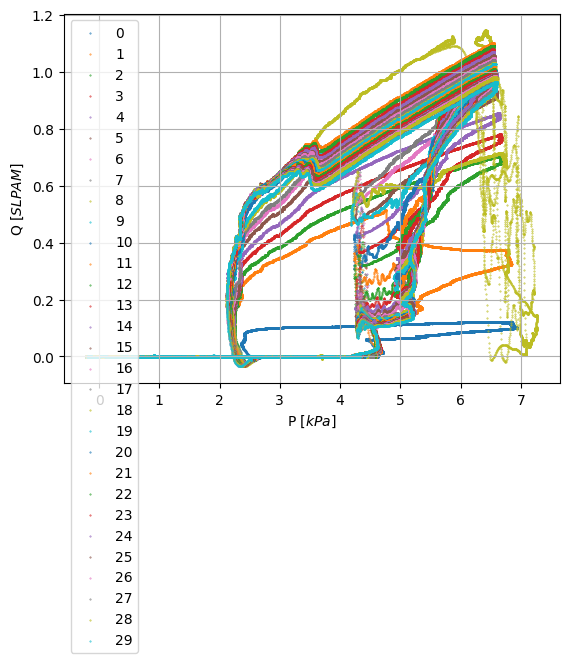

In [28]:
#Plot sliced data and extract opening pressure 

P_open = []
P_close = []

open_treshold = 0.01 # slpm
close_treshold = 0.0025 # slpm

# Initialize a flag to indicate whether the threshold has been crossed from below
crossed_threshold = False

for ii,jj in enumerate(data_sliced):    
    Q=data_sliced[ii]['Rescaled_Flow']
    P_sliced=data_sliced[ii]['Pressure']
    plt.scatter(P_sliced,Q, label=ii,marker=".",s=0.6)

    #Extract opening pressure
    opening_index=np.argmax(Q > 0.01) # If the flow passes a certain treshold, then we can assume it is open
    P_open.append(P_sliced[opening_index]) # Use previous index to recover the pressure 
    
    
    # Loop through the data
    for jj in range(1, len(data_sliced[ii])):
        # Check for crossing the threshold from below to above
        if data_sliced[ii]['Rescaled_Flow'][jj] > close_treshold:
            crossed_threshold = True
        
        # Check for crossing the threshold from above to below after it's been crossed from below
        if crossed_threshold and data_sliced[ii]['Rescaled_Flow'][jj] < close_treshold:
            #indices.append(i)
            P_close.append(P_sliced[jj])
            
            # Reset the flag if you are only interested in the first such occurrence
            crossed_threshold = False

    #Extract closing pressure
    #for jj in Q:  
    


plt.ylabel('Q [$SLPAM$]')
plt.xlabel('P [$kPa$]')
plt.legend()   
#plt.ylim(-0.01,0.01)
plt.grid()

In [30]:
P_close

[2.501683057694465,
 2.3610613471681527,
 2.3724891503718135,
 3.299916238472487,
 2.334159802545727,
 2.3525243048340565,
 2.3325256492276503,
 2.335523475314607,
 2.30297564922765,
 3.6937246480834656,
 3.7003626915617254,
 6.687397731607445,
 6.488526907808821,
 2.3398624341246754,
 0.9132691274885405,
 1.8994750199370367,
 2.2618682407608306,
 2.2781083437356595,
 2.3159925256578577,
 4.234358915818007,
 2.2835968448798245,
 2.2441855748569393,
 2.2611187842390934,
 2.2589098597539667,
 2.2415371194793674,
 2.250423532522844,
 2.2483160382436704,
 2.237789836870671,
 2.2516576000285653,
 4.216484659525104,
 2.2507390931635762,
 2.24712141581804,
 4.210427022225333,
 2.2399198711956134,
 2.2222822853832565,
 2.233484688129251,
 2.2354569421338275,
 4.2240637499141185,
 4.223815809410687,
 2.2375926114702125,
 2.2238657235983585,
 2.22020860117273]

([<matplotlib.axis.XTick at 0x20a88759950>], [Text(1, 0, 'DS30: R9, h0')])

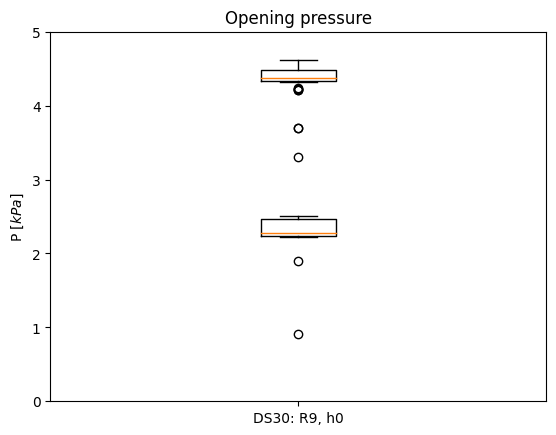

In [33]:
P_open
plt.boxplot(P_open)
plt.boxplot(P_close)
plt.ylim(0,5)

# Add title and labels for clarity
plt.title("Opening pressure")
plt.ylabel("P [$kPa$]")
plt.xticks([1], ['DS30: R9, h0'])

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')
